<font size="+3" color='#053c96'><b> Problem Statement</b></font>

In order to keep up with its US and European rivals, the Japanese automaker Kuruma Auto plans to establish a manufacturing facility there and produce automobiles there. 

To learn about the factors that affect car pricing, they have hired an automobile consultancy firm. Since the American market may be significantly different from the Japanese market in terms of these variables, they are particularly interested in comprehending them. The firm is curious about:


    -What factors are important for forecasting a car's price? 
    -How well do those factors accurately reflect a car's price?

The consultancy company collected a sizable dataset of various car kinds sold on the American market based on numerous market surveys. 

<font size="+3" color='#053c96'><b>Bussiness Goal</b></font>

Modelling the cost of autos using the available independent variables is required. The management will use it to determine the precise relationship between price variation and independent variables. In order to maintain specific pricing, they can adjust the car's design, the company's marketing plan, etc. The model will also help management better understand how prices change in a new market. 

In [1]:
import warnings
warnings.filterwarnings('ignore')

#importing the requied libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV,RandomizedSearchCV
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set(rc={'figure.figsize':(8,8)})

<font size="+3" color='#540b11'><b>1. Data cleaning </b></font>

In [2]:
#reading the given data
car=pd.read_csv('Kuruma_CarPrice.csv')
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
#finding out rows and columns in given data
car.shape

(205, 26)

In [4]:
#checking for null values
print(car['CarName'].isnull().sum())

0


In [99]:
car.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## Drop car Id 

In [6]:
#dropping the car_ID
car=car.drop(['car_ID'],axis=1)

## Extracting car company from car name

In [7]:
#Splitting the Company name from Car Name column
Company_Name = car['CarName'].apply(lambda x : x.split(' ')[0])
car.insert(3,"CompanyName",Company_Name)
car.drop(['CarName'],axis=1,inplace=True)
car.head()

,symboling,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,audi,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,audi,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Handling duplicate values in car name 

* nissan and Nissan are same
* toyota and toyouta are same 
* vokswagen , volkswagen and vw are same
* mazda and maxda are same
* porcshce and porsche are same

In [8]:
#Fixing invalid values
car['CompanyName'] = car['CompanyName'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

In [9]:
car['symboling']=car['symboling'].astype('str')

# Categorical columns

In [10]:
categoricalCols=car.select_dtypes(include=['object']).columns

In [11]:
car[categoricalCols].head(2)

,symboling,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,3,gas,alfa-romero,std,two,convertible,rwd,front,dohc,four,mpfi
1,3,gas,alfa-romero,std,two,convertible,rwd,front,dohc,four,mpfi


## Numerical columns 

In [12]:
numericalCols=car.select_dtypes(exclude=['object']).columns

In [13]:
car[numericalCols].head(2)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0


<font size="+3" color='#540b11'><b>2. Exploratory Data Analysis </b></font>

In [14]:
car.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Visualise different car names 

[Text(0.5, 0, 'Car company'), Text(0, 0.5, 'Frequency of company')]

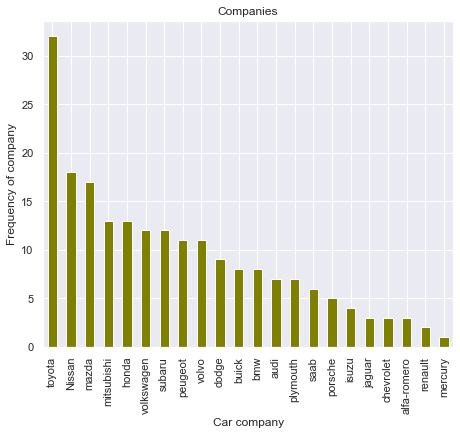

In [15]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = car.CompanyName.value_counts().plot(kind = 'bar', color='olive')
plt.title('Companies')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

According to the dataset-
* The most suitable car is Toyota
* The least suitable car is Mercury

# Fuel type Ratio

In [16]:
df=pd.DataFrame(car['fueltype'].value_counts())

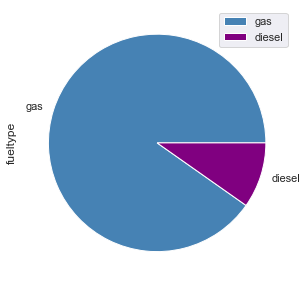

In [17]:
plot = df.plot.pie(y='fueltype', figsize=(5, 5), colors=['steelblue', 'purple'])

* Gas fuel is used in most of the cars 

# Price distribution of cars

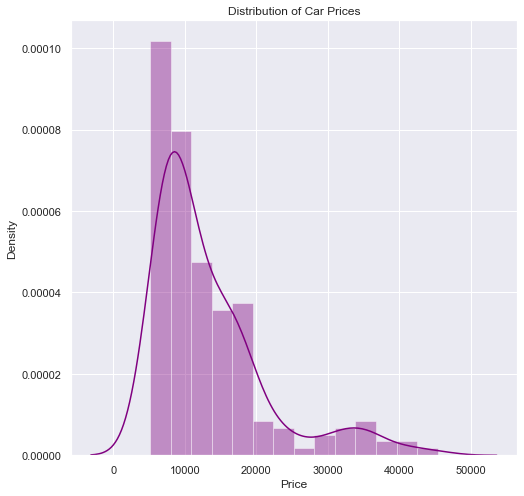

In [18]:
sns.distplot(car['price'], kde=True, color='purple')

# Adding labels and title
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Distribution of Car Prices')

plt.show()

* Price distribution plot is right skewed 
* maximum  number of cars are in range of 20000

# Price distribution of diesel vs gas car

Text(0.5, 1.0, 'Distribution of ages of diesel vehicles')

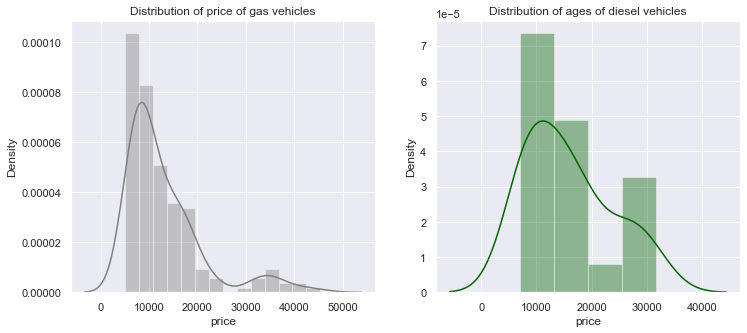

In [19]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(car[(car.fueltype== 'gas')]["price"],color='gray',ax=ax)
ax.set_title('Distribution of price of gas vehicles')

ax=f.add_subplot(122)
sns.distplot(car[(car.fueltype == 'diesel')]['price'],color='darkgreen',ax=ax)
ax.set_title('Distribution of ages of diesel vehicles')

<AxesSubplot:xlabel='fueltype', ylabel='price'>

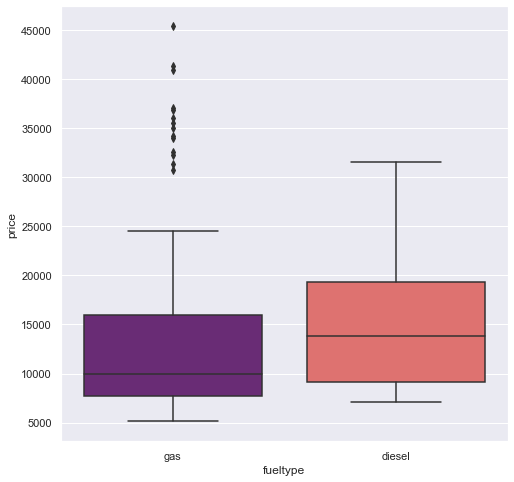

In [20]:
sns.boxplot(x = 'fueltype', y = 'price', data = car,palette='magma')

* Price of diesel is much higher than of gas , also there are some outliers in gas vehicles

# Aspiration ratio

In [21]:
df=pd.DataFrame(car['aspiration'].value_counts())

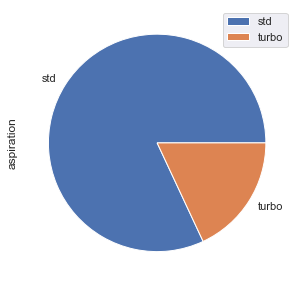

In [22]:
plot = df.plot.pie(y='aspiration', figsize=(5, 5))

* Most of the cars have standard aspiration

# Price distribution of Std vs Turbo aspiration vehicles

Text(0.5, 1.0, 'Price distribution of Std aspiration vehicles')

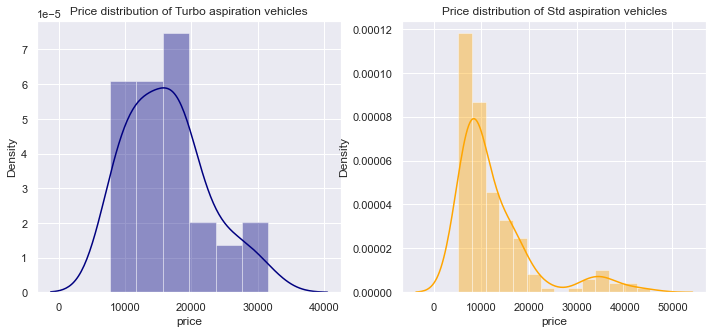

In [23]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
plot=sns.distplot(car[(car.aspiration== 'turbo')]["price"],color='navy',ax=ax)
ax.set_title('Price distribution of Turbo aspiration vehicles')

ax=f.add_subplot(122)
plot=sns.distplot(car[(car.aspiration == 'std')]['price'],color='orange',ax=ax)
ax.set_title('Price distribution of Std aspiration vehicles')


<AxesSubplot:xlabel='aspiration', ylabel='price'>

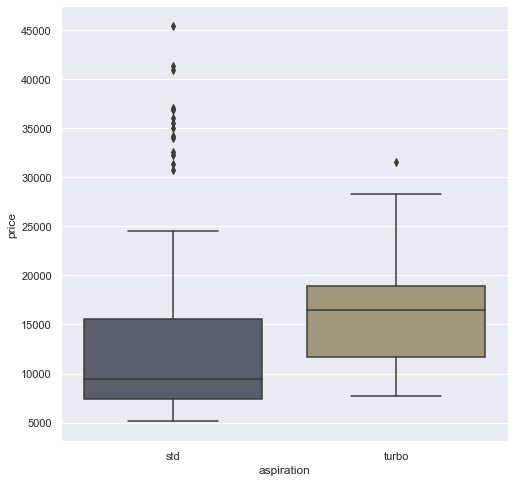

In [24]:
sns.boxplot(x = 'aspiration', y = 'price', data = car,palette='cividis')

* Although there are some outliers in the standard pricing, the cost of a turbo is more expensive than a standard one.

# Symboling 

Initial risk factor symbols for cars are linked to their cost. The symbol is then modified by shifting it up or down the scale depending on how dangerous it is. Actuaries refer to this procedure as "symboling". A rating of +3 means the vehicle is risky, while a value of -3 means it is probably fairly safe.

In [25]:
df=pd.DataFrame(car['symboling'].value_counts()).reset_index().rename(columns={'index':'symboling','symboling':'count'})

<AxesSubplot:xlabel='symboling', ylabel='count'>

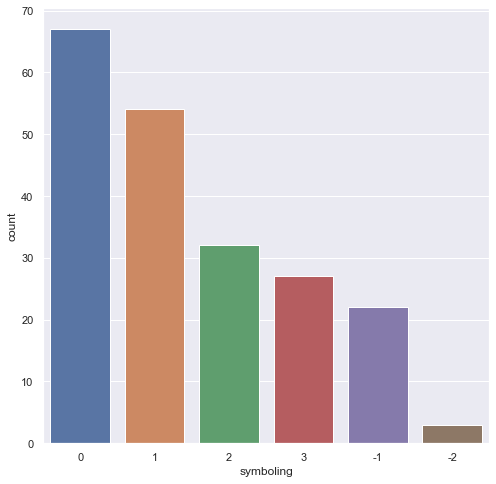

In [26]:
sns.barplot(x='symboling',y='count',data=df)

 * Most of the car symboling has 0 value 

# Price distribution according to symboling 

<AxesSubplot:xlabel='symboling', ylabel='price'>

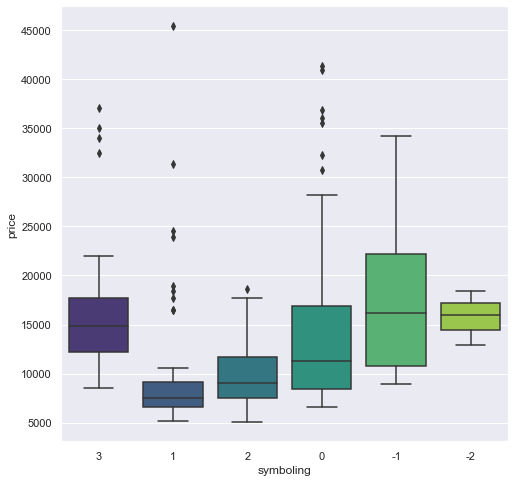

In [27]:
sns.boxplot(x = 'symboling', y = 'price', data = car,palette='viridis')

* Price of -1 symboling is higher in compare to others

# Door number

In [28]:
df=pd.DataFrame(car['doornumber'].value_counts())

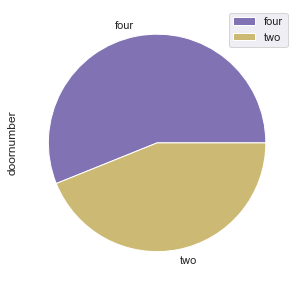

In [29]:
plot = df.plot.pie(y='doornumber', figsize=(5, 5), colors=['m', 'y'])

* 115 cars has four dooors and 90 cars has 2 doors

# Price distribution according to door number 

Text(0.5, 1.0, 'Price distribution of cars having four doors')

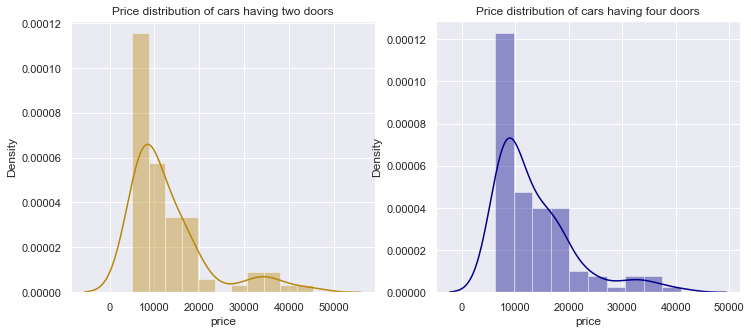

In [30]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
plot=sns.distplot(car[(car.doornumber== 'two')]["price"],color='darkgoldenrod',ax=ax)
ax.set_title('Price distribution of cars having two doors')

ax=f.add_subplot(122)
plot=sns.distplot(car[(car.doornumber == 'four')]['price'],color='darkblue',ax=ax)
ax.set_title('Price distribution of cars having four doors')


<AxesSubplot:xlabel='doornumber', ylabel='price'>

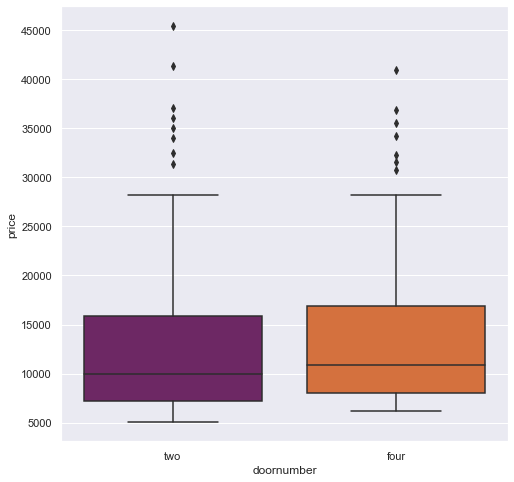

In [31]:
sns.boxplot(x = 'doornumber', y = 'price', data = car,palette='inferno')

* As you can see, there is a small variation between the distributions of cars with two doors and those with four doors.

# Carbody

In [32]:
df=pd.DataFrame(car['carbody'].value_counts())

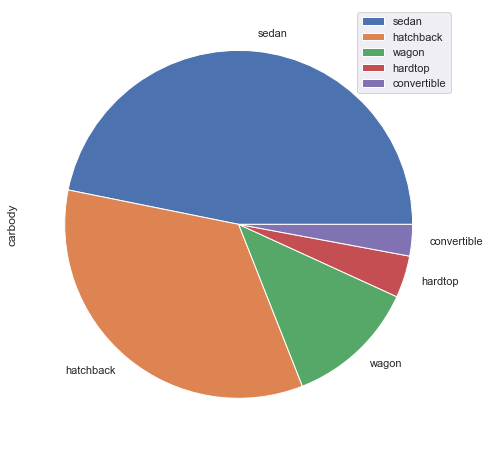

In [33]:
plot = df.plot.pie(y='carbody', figsize=(8, 8))

* majority of car body are sedan and hatchback

# Price distribution according to car body

<AxesSubplot:xlabel='carbody', ylabel='price'>

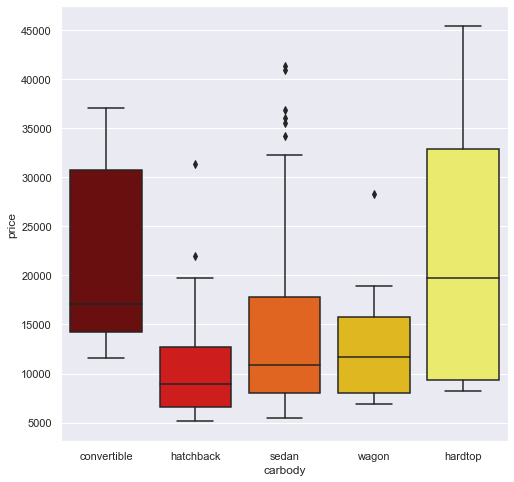

In [34]:
sns.boxplot(x = 'carbody', y = 'price', data = car,palette='hot')

* Compared to other prices, the hardtop's cost is very high.

# Drive wheel

In [35]:
df=pd.DataFrame(car['drivewheel'].value_counts())

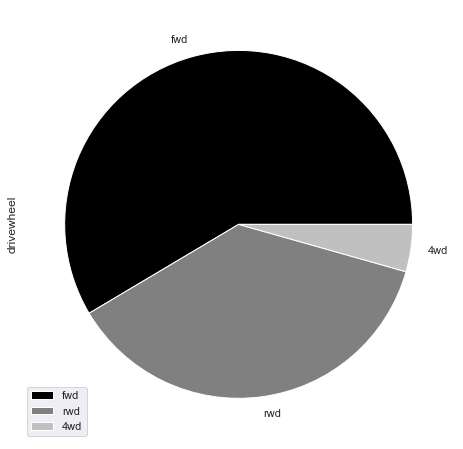

In [36]:
plot = df.plot.pie(y='drivewheel', figsize=(8, 8), colors = ['black','gray','silver'])

* Most vehicles have front-wheel drive.

# Price distribution according to drive wheel 

<AxesSubplot:xlabel='drivewheel', ylabel='price'>

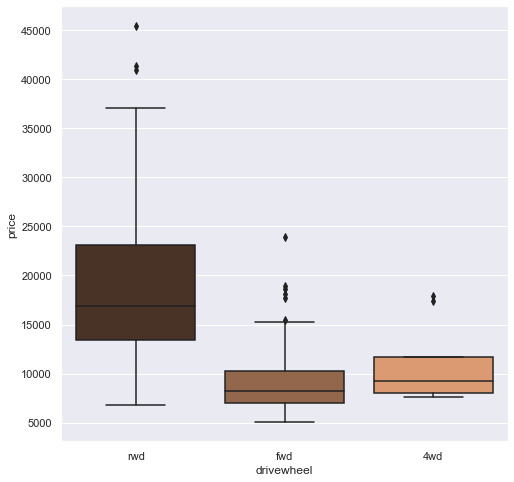

In [37]:
sns.boxplot(x = 'drivewheel', y = 'price', data = car,palette='copper')

* RWD drivewheel cars have a higher price range than other vehicles.

# Engine location

In [38]:
df=pd.DataFrame(car['enginelocation'].value_counts())

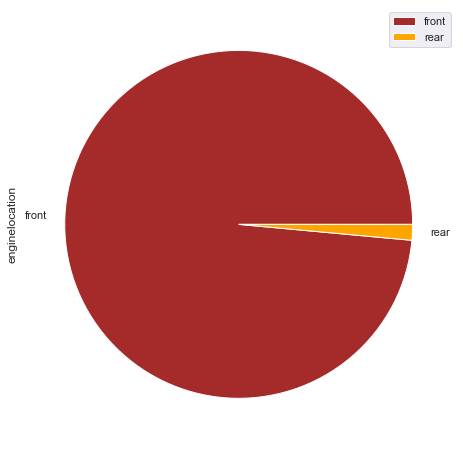

In [39]:
plot = df.plot.pie(y='enginelocation', figsize=(8, 8), colors = ['brown', 'orange'])

* there are fewer rear-engine vehicles. 

# Engine type

In [40]:
df=pd.DataFrame(car['enginetype'].value_counts())

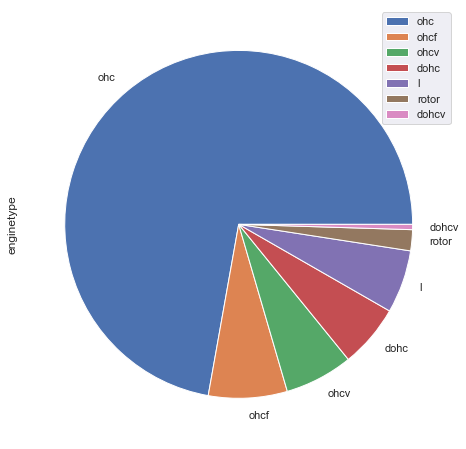

In [41]:
plot = df.plot.pie(y='enginetype', figsize=(8, 8))

* 'ohc' engines are the most common engine type.

<AxesSubplot:xlabel='enginetype', ylabel='price'>

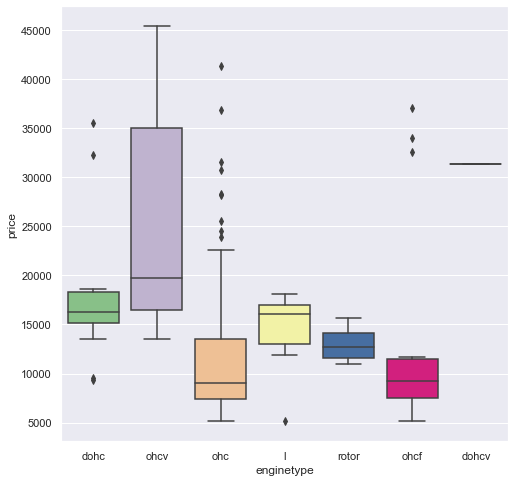

In [42]:
sns.boxplot(x = 'enginetype', y = 'price', data = car,palette='Accent')

* In comparison to other car pricing ranges, ohcv engine cars are extremely expensive.

# Cylinder number

In [43]:
df=pd.DataFrame(car['cylindernumber'].value_counts())

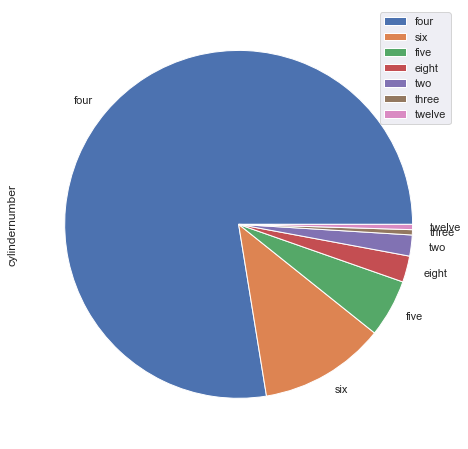

In [44]:
plot = df.plot.pie(y='cylindernumber', figsize=(8, 8))

* Most vehicles have four cylinders.

# Price distribution according to cylinder number

<AxesSubplot:xlabel='cylindernumber', ylabel='price'>

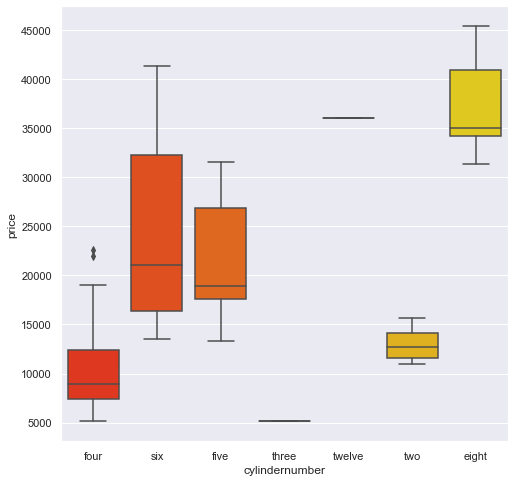

In [45]:
sns.boxplot(x = 'cylindernumber', y = 'price', data = car,palette='autumn')

There is just one car with cylinders 3 and 12, and car with cylinder number 8 is more expensive.

# Fuel system 

In [46]:
df=pd.DataFrame(car['fuelsystem'].value_counts()).reset_index().rename(columns={'index':'fuelsystem','fuelsystem':'count'})

<AxesSubplot:xlabel='fuelsystem', ylabel='count'>

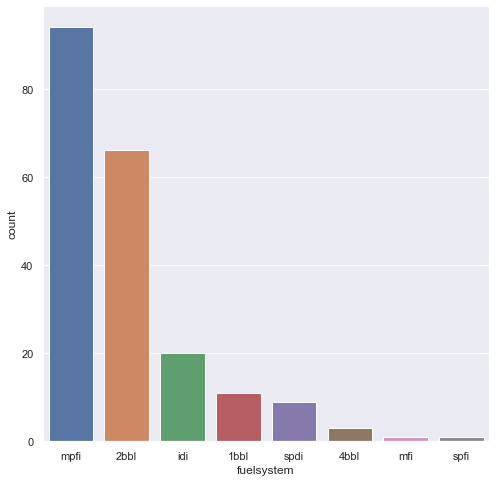

In [47]:
sns.barplot(x='fuelsystem',y='count',data=df)

* most number of cars having fuel system mpfi
* least number of cars having fuel system mfi and spfi

# Price distribution according to fuel system

<AxesSubplot:xlabel='fuelsystem', ylabel='price'>

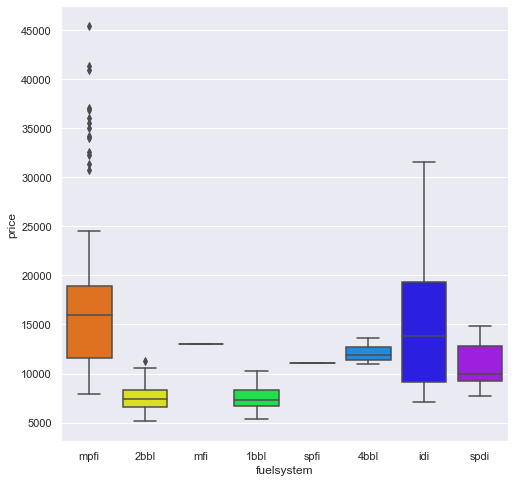

In [48]:
sns.boxplot(x = 'fuelsystem', y = 'price', data = car,palette='gist_rainbow')

* The cost of an automobile with an idi fuel system is expensive. 

# Visualising Numerical features

# Wheel base Vs Price


<AxesSubplot:xlabel='wheelbase', ylabel='price'>

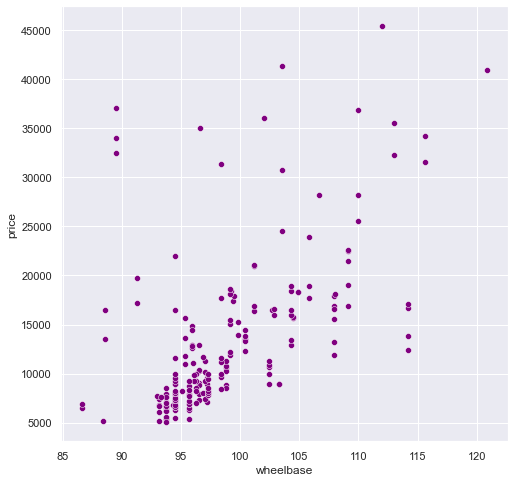

In [49]:
sns.scatterplot(x="wheelbase", y="price", data=car,color='purple')

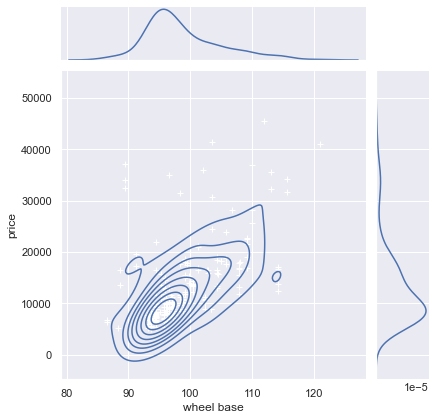

In [50]:
g = sns.jointplot(x="wheelbase", y="price", data=car, kind="kde", color="b")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("wheel base", "price");

* Highly scattered points

# Carlength vs Car price

<AxesSubplot:xlabel='carlength', ylabel='price'>

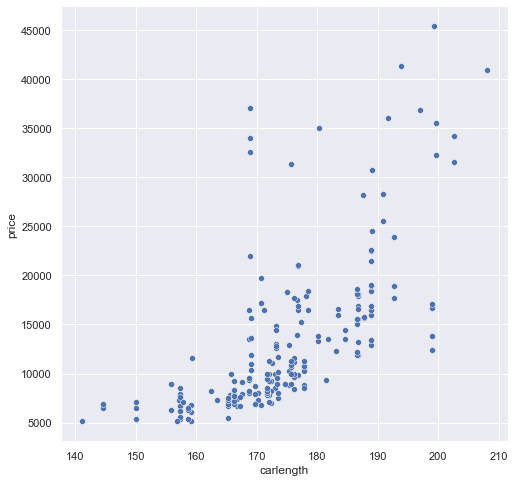

In [51]:
sns.scatterplot(x="carlength", y="price", data=car,color='b')

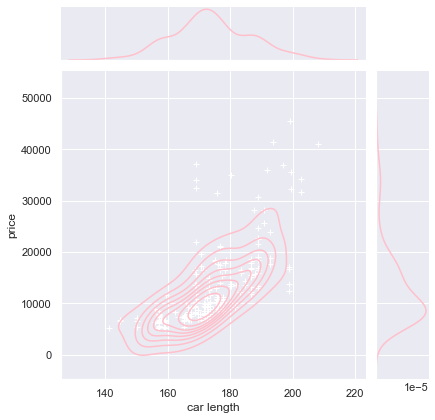

In [52]:
g = sns.jointplot(x="carlength", y="price", data=car, kind="kde", color="pink")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("car length", "price");

* Car length is dispersed, though not as dispersed as wheelbase

# Car width Vs Price

<AxesSubplot:xlabel='carwidth', ylabel='price'>

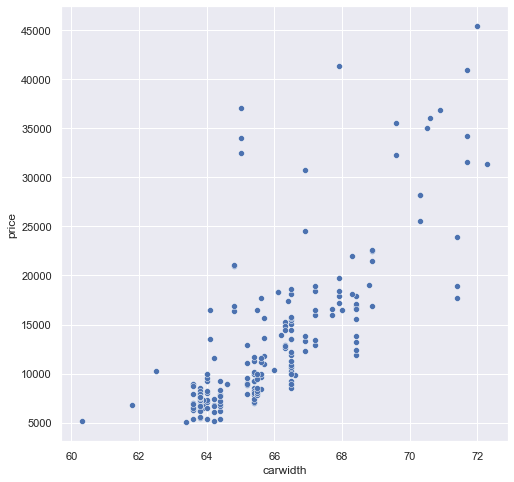

In [53]:
sns.scatterplot(x="carwidth", y="price", data=car,color='b')

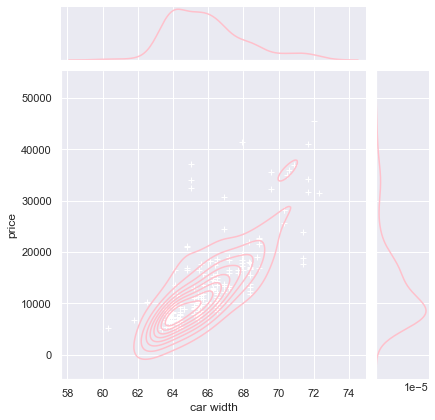

In [54]:
g = sns.jointplot(x="carwidth", y="price", data=car, kind="kde", color="pink")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("car width", "price");

# Car length vs Car width

<AxesSubplot:xlabel='carlength', ylabel='carwidth'>

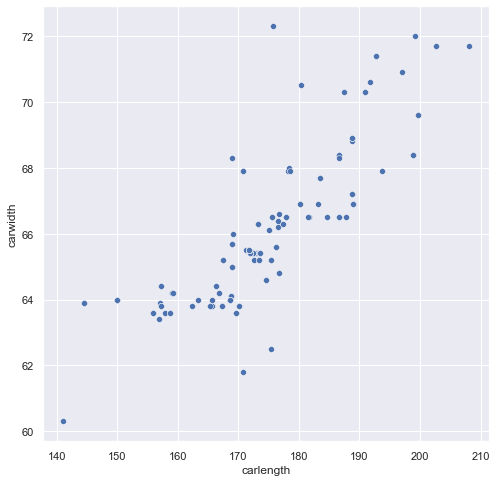

In [55]:
sns.scatterplot(x="carlength", y="carwidth", data=car,color='b')

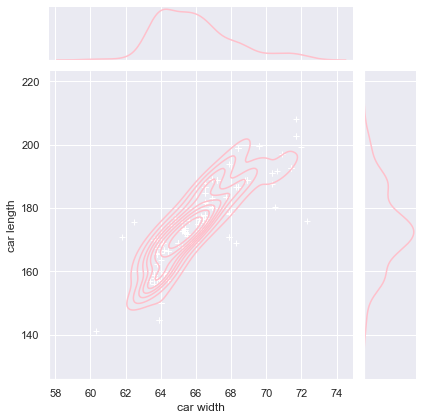

In [56]:
g = sns.jointplot(x="carwidth", y="carlength", data=car, kind="kde", color="pink")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("car width", "car length");

* A substantial correlation between vehicle width and length is observed. 

# Curbweight vs Price

<AxesSubplot:xlabel='curbweight', ylabel='price'>

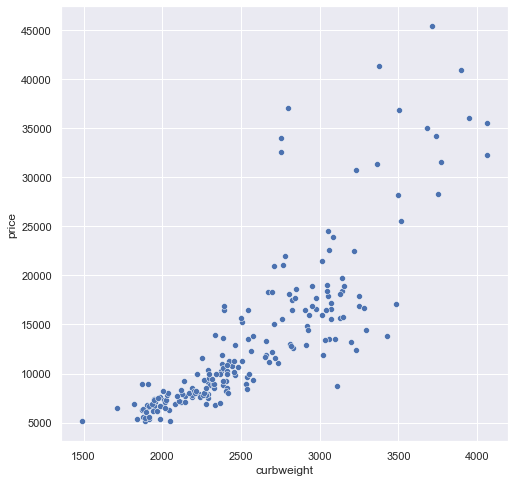

In [57]:
sns.scatterplot(x="curbweight", y="price", data=car,color='b')

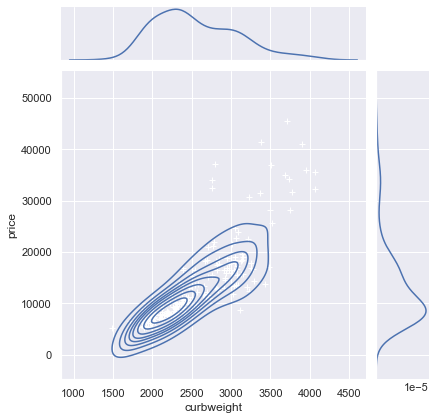

In [58]:
g = sns.jointplot(x="curbweight", y="price", data=car, kind="kde", color="b")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("curbweight", "price");

* As you can also see in the joint plot, the colour lightens after curbweight of 2900, and points start to disperse after curbweight of 2900. Initially, it is growing as curbweight increases.


# Engine size Vs Price

<AxesSubplot:xlabel='enginesize', ylabel='price'>

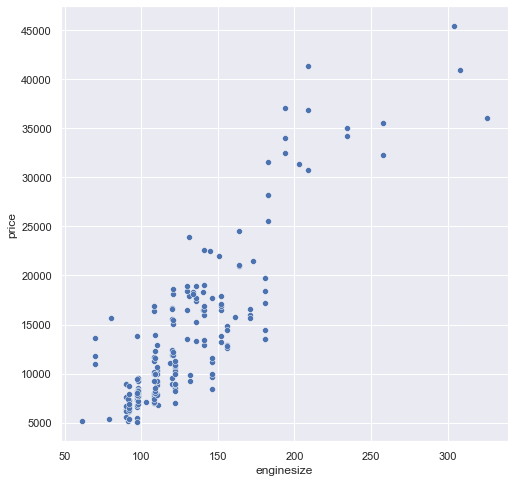

In [59]:
sns.scatterplot(x="enginesize", y="price", data=car,color='b')

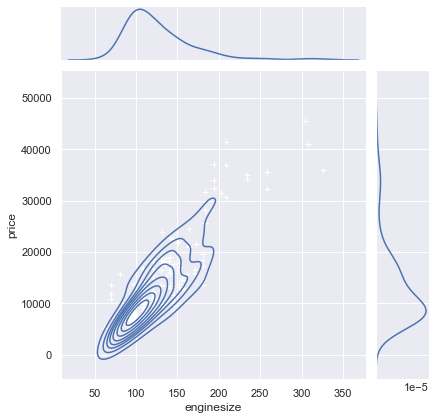

In [60]:
g = sns.jointplot(x="enginesize", y="price", data=car, kind="kde", color="b")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("enginesize", "price");

* Points are dispersed after an engine size of 140; initially, it is rising as curbweight rises, as can also be seen in the joint plot, where the colour becomes lighter.

# Boreratio vs Price

<AxesSubplot:xlabel='boreratio', ylabel='price'>

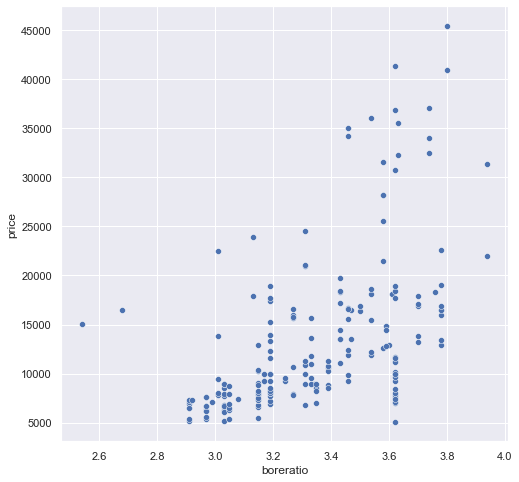

In [61]:
sns.scatterplot(x="boreratio", y="price", data=car,color='b')

# Stroke vs price

<AxesSubplot:xlabel='stroke', ylabel='price'>

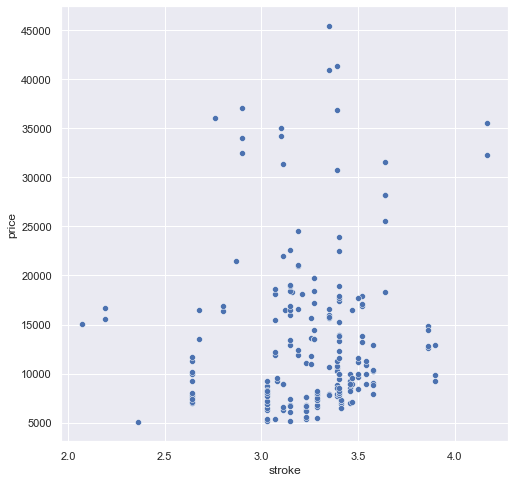

In [62]:
sns.scatterplot(x="stroke", y="price", data=car,color='b')

* correlation between stroke vs price is very weak 

# Compression ratio vs Price

<AxesSubplot:xlabel='compressionratio', ylabel='price'>

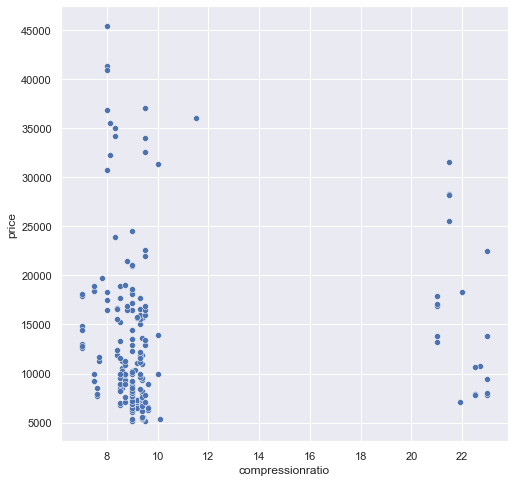

In [63]:
sns.scatterplot(x="compressionratio", y="price", data=car,color='b')

* There is no relation between compression ratio and price

# Horsepower vs Price

<AxesSubplot:xlabel='horsepower', ylabel='price'>

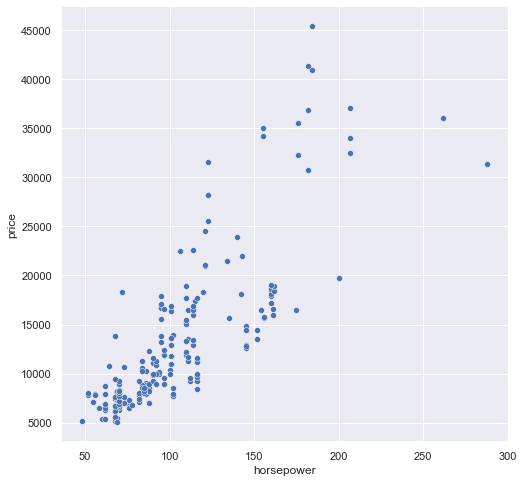

In [64]:
sns.scatterplot(x="horsepower", y="price", data=car,color='b')

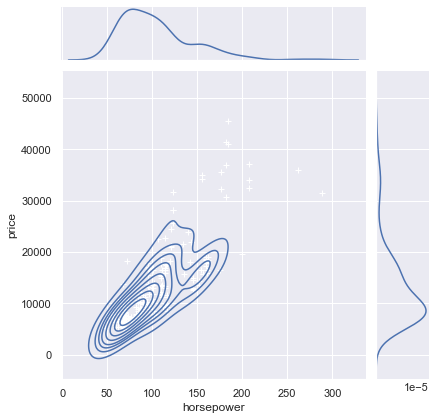

In [65]:
g = sns.jointplot(x="horsepower", y="price", data=car, kind="kde", color="b")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("horsepower", "price");

# Peakrpm vs price

<AxesSubplot:xlabel='peakrpm', ylabel='price'>

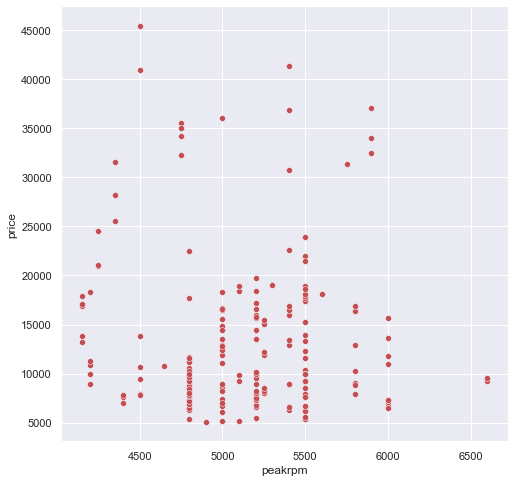

In [66]:
sns.scatterplot(x="peakrpm", y="price", data=car,color='r')

* There is no correlation between peakrpm and  price

# Citympg vs Price

<AxesSubplot:xlabel='citympg', ylabel='price'>

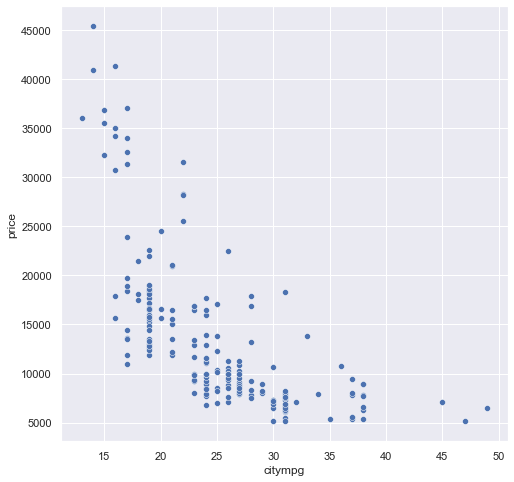

In [67]:
sns.scatterplot(x="citympg", y="price", data=car,color='b')

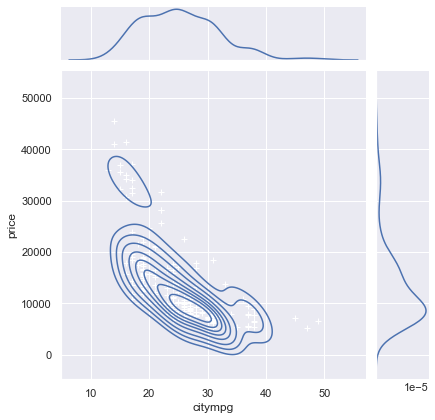

In [68]:
g = sns.jointplot(x="citympg", y="price", data=car, kind="kde", color="b")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("citympg", "price");

* There is negative correlation between citympg and price

# Highwaympg vs Price

<AxesSubplot:xlabel='highwaympg', ylabel='price'>

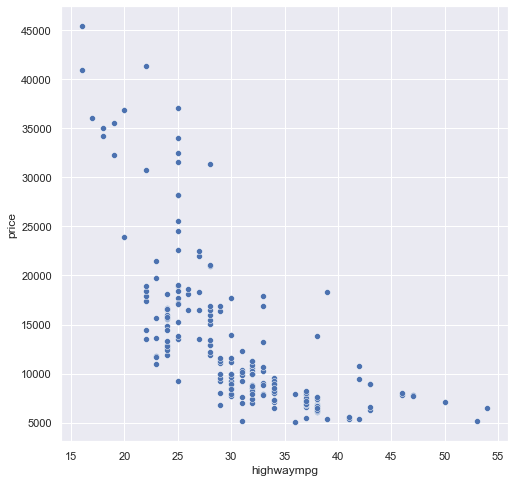

In [69]:
sns.scatterplot(x="highwaympg", y="price", data=car,color='b')

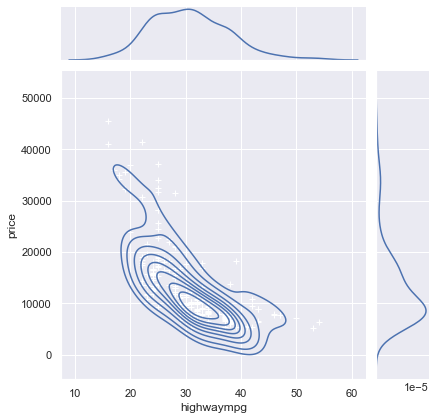

In [70]:
g = sns.jointplot(x="highwaympg", y="price", data=car, kind="kde", color="b")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("highwaympg", "price");

* There is negative correlation between highwaympg and price

# Pairplot of all numerical features

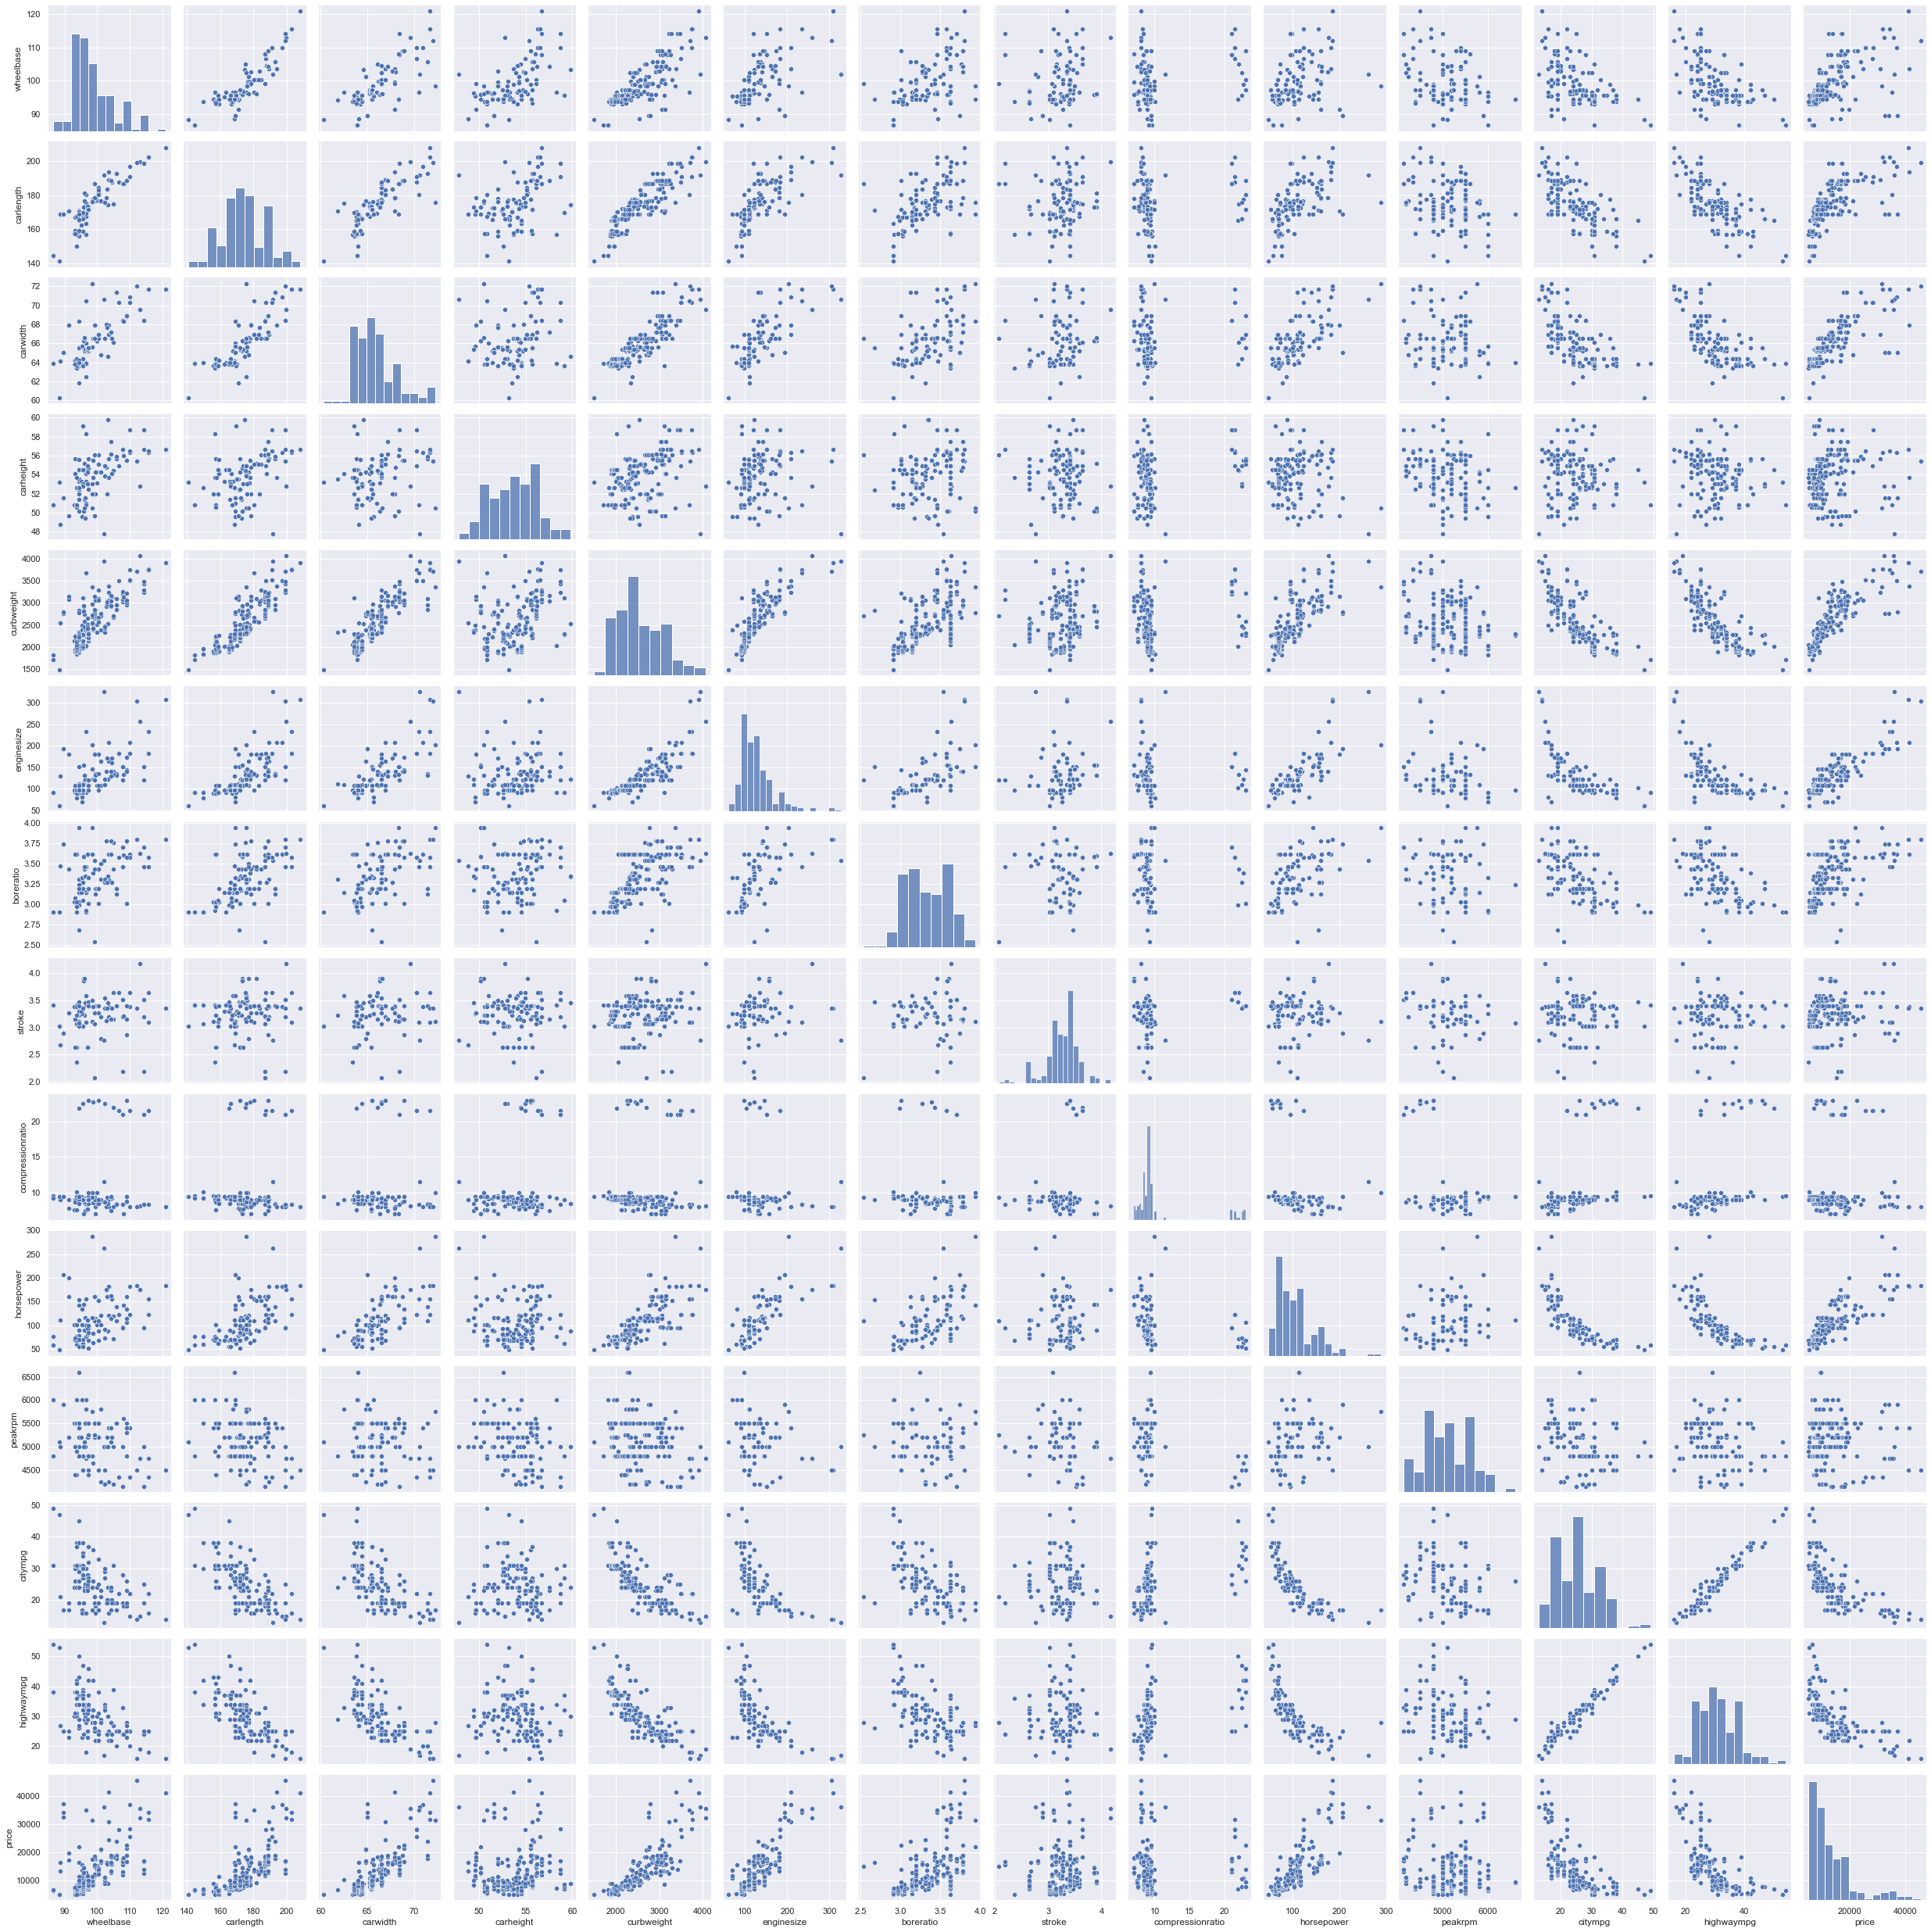

In [71]:
ax = sns.pairplot(car[numericalCols])

# Correlation matrix

In [72]:
car[numericalCols].corr()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984
horsepower,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139


<AxesSubplot:>

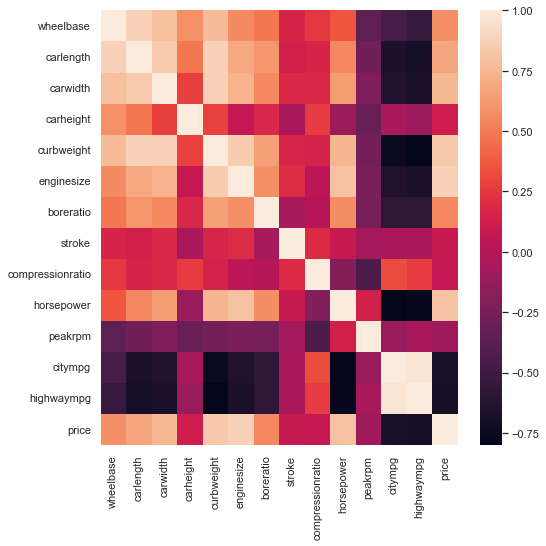

In [73]:
sns.heatmap(car[numericalCols].corr())

* Wheelbase has a strong positive correlation with carlength, carwidth, and curbweight. 
* Carlength has a strong positive correlation with curbweight. 
* Carlength has a strong negative correlation with highway mpg. 
* Carwidth has a strong positive correlation with curbweight. 
* Engine size has a strong positive correlation with horsepower. 
* Curbweight has a strong positive correlation with engine size and horse power. 



# Scatter plot of wheelbase , carlength,carheight and carweight  with price

In [74]:
col=['wheelbase','carlength','carwidth','curbweight','price']

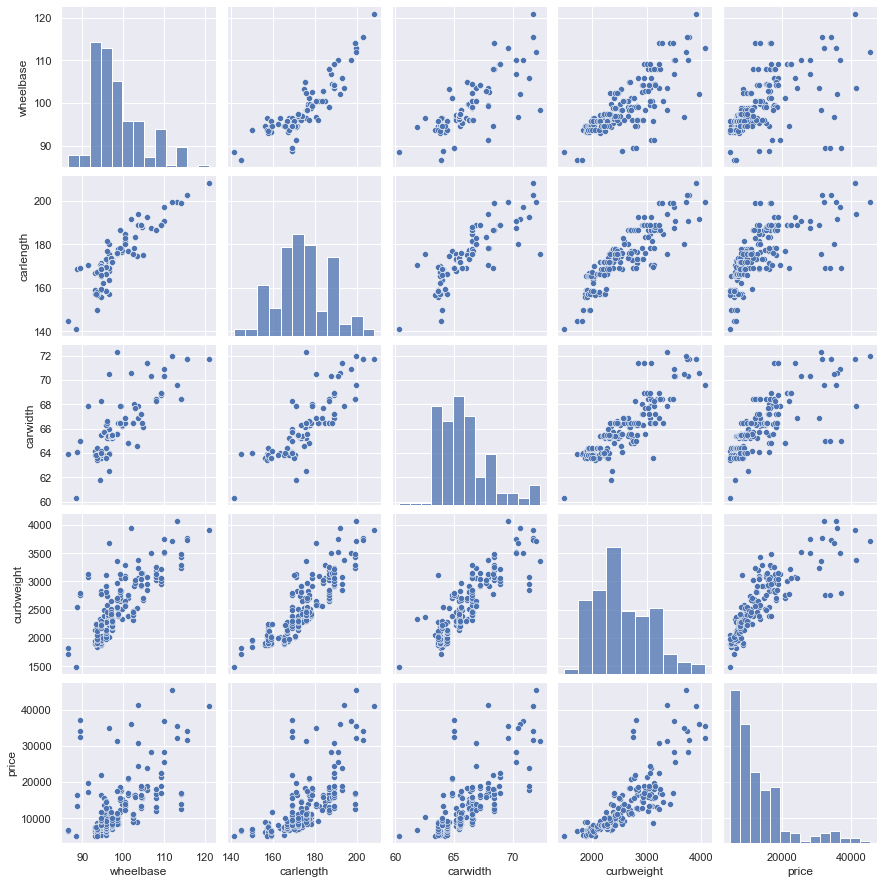

In [75]:
sns.pairplot(car[col])

<AxesSubplot:>

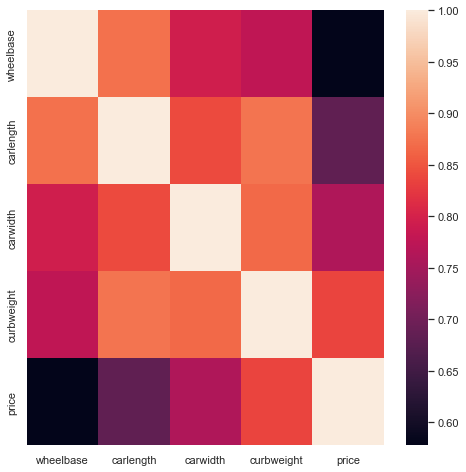

In [76]:
sns.heatmap(car[col].corr())

# Scatter plot of carlength,curbweight,highwaympg with price

In [77]:
col=['carlength','highwaympg','curbweight','price']

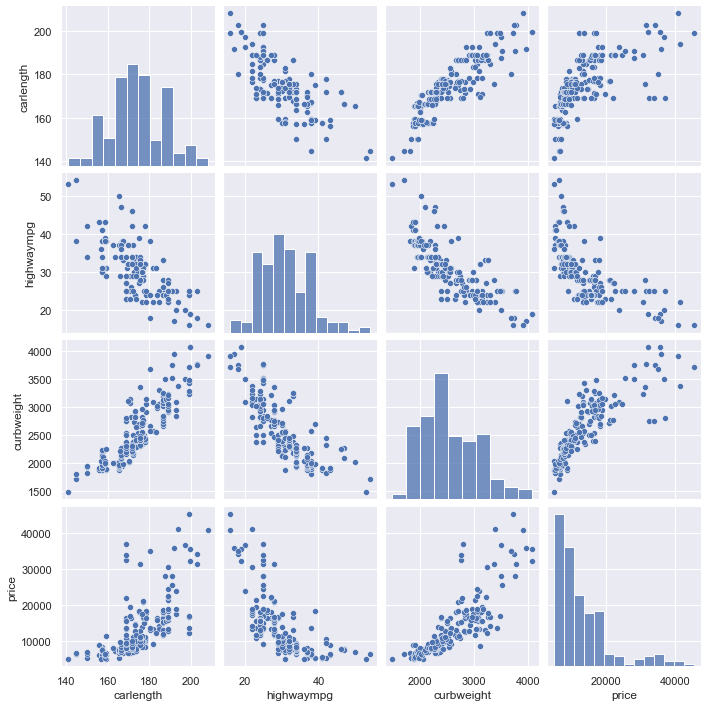

In [78]:
sns.pairplot(car[col])

<AxesSubplot:>

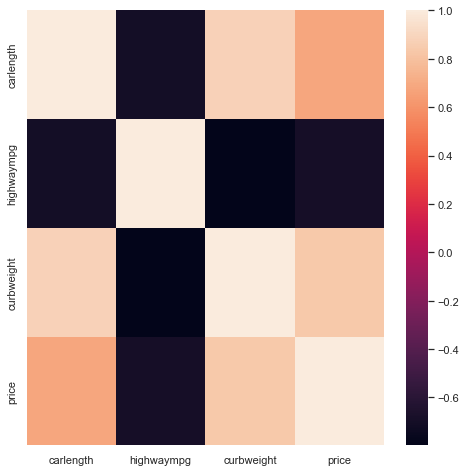

In [79]:
sns.heatmap(car[col].corr())

# Scatter plot of carwidth,curbweight ,engine size and price

In [80]:
col=['carwidth','curbweight','enginesize','price']

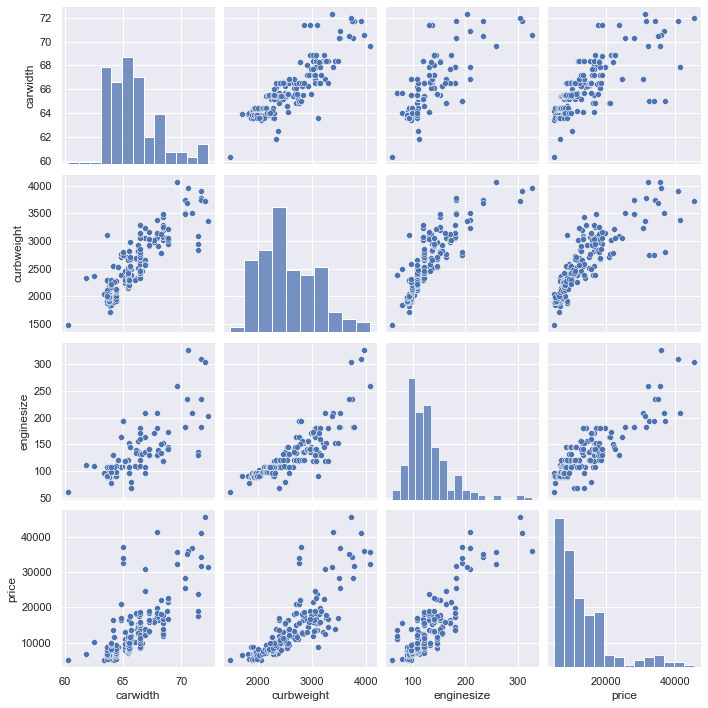

In [81]:
sns.pairplot(car[col])

<AxesSubplot:>

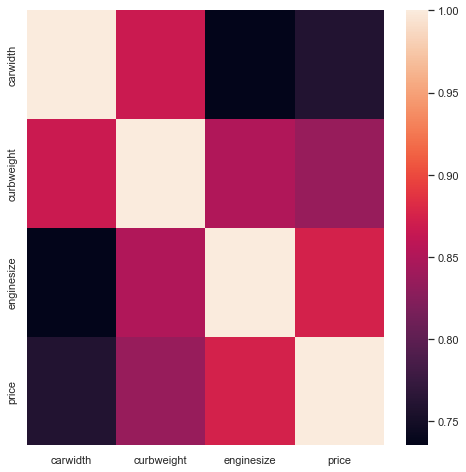

In [82]:
sns.heatmap(car[col].corr())

# Scatter plot of curbweight ,engine size ,horse power,highwaympg and price

In [83]:
col=['curbweight','enginesize','horsepower','highwaympg','price']

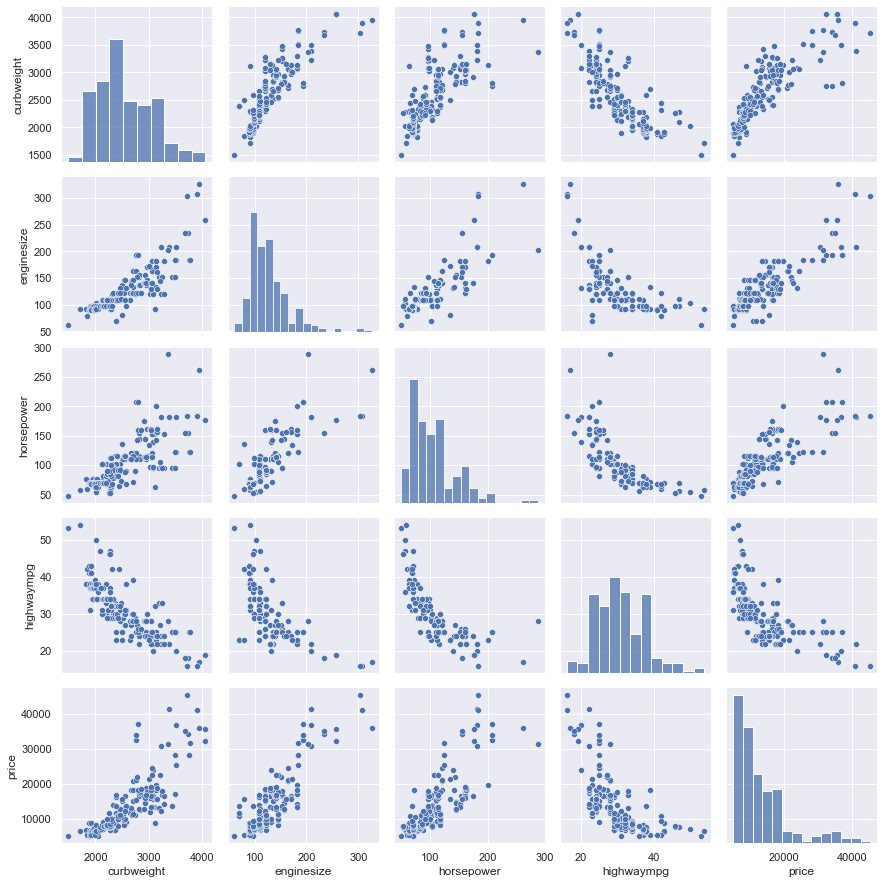

In [84]:
sns.pairplot(car[col])

<AxesSubplot:>

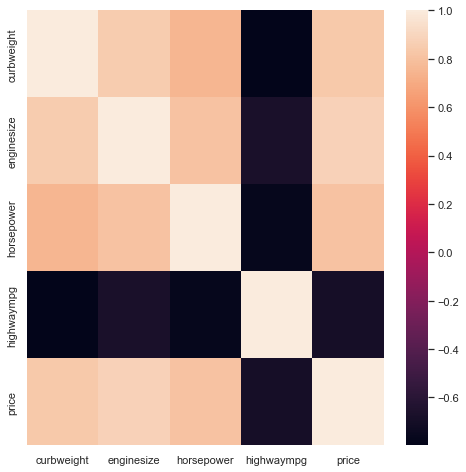

In [85]:
sns.heatmap(car[col].corr())

# Horsepower,citympg , highway mpg  and price

In [86]:
col=['horsepower','citympg','highwaympg','price']

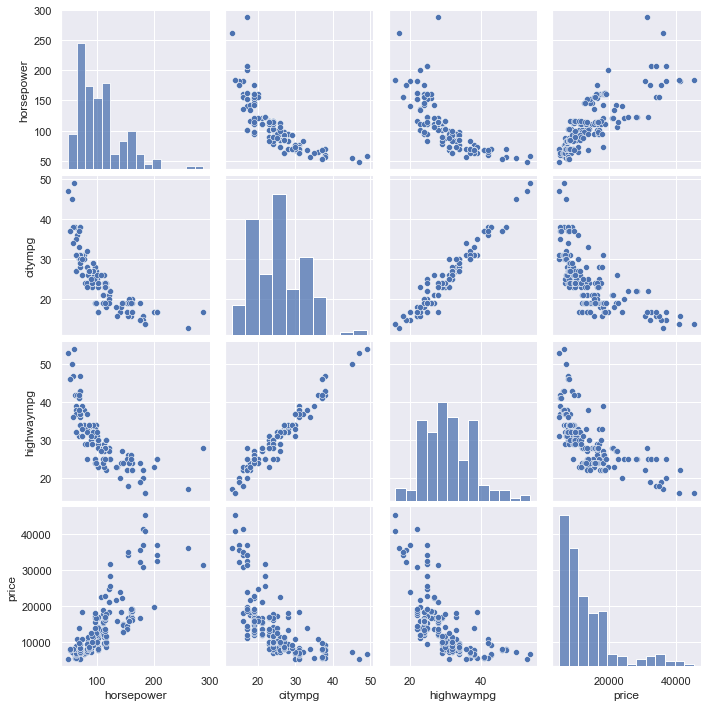

In [87]:
sns.pairplot(car[col])

<AxesSubplot:>

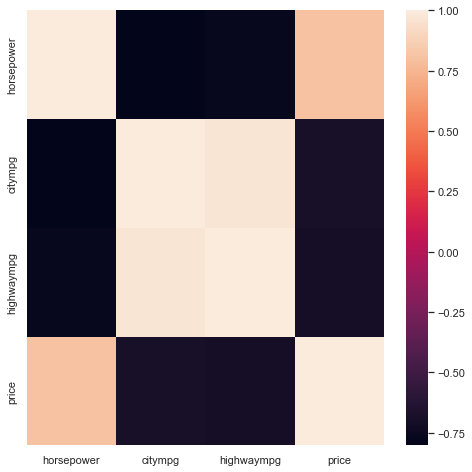

In [88]:
sns.heatmap(car[col].corr())

# Horsepower Vs Car Body categorized by carbody

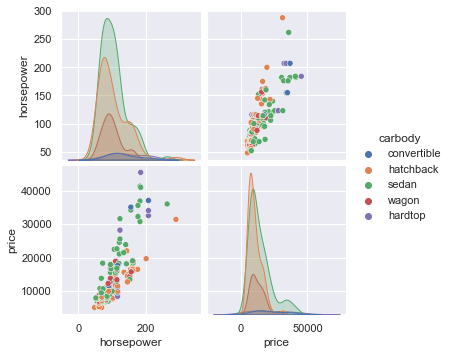

In [89]:
sns.pairplot(car[['horsepower','price','carbody']], hue="carbody");

# Fitting all features with price

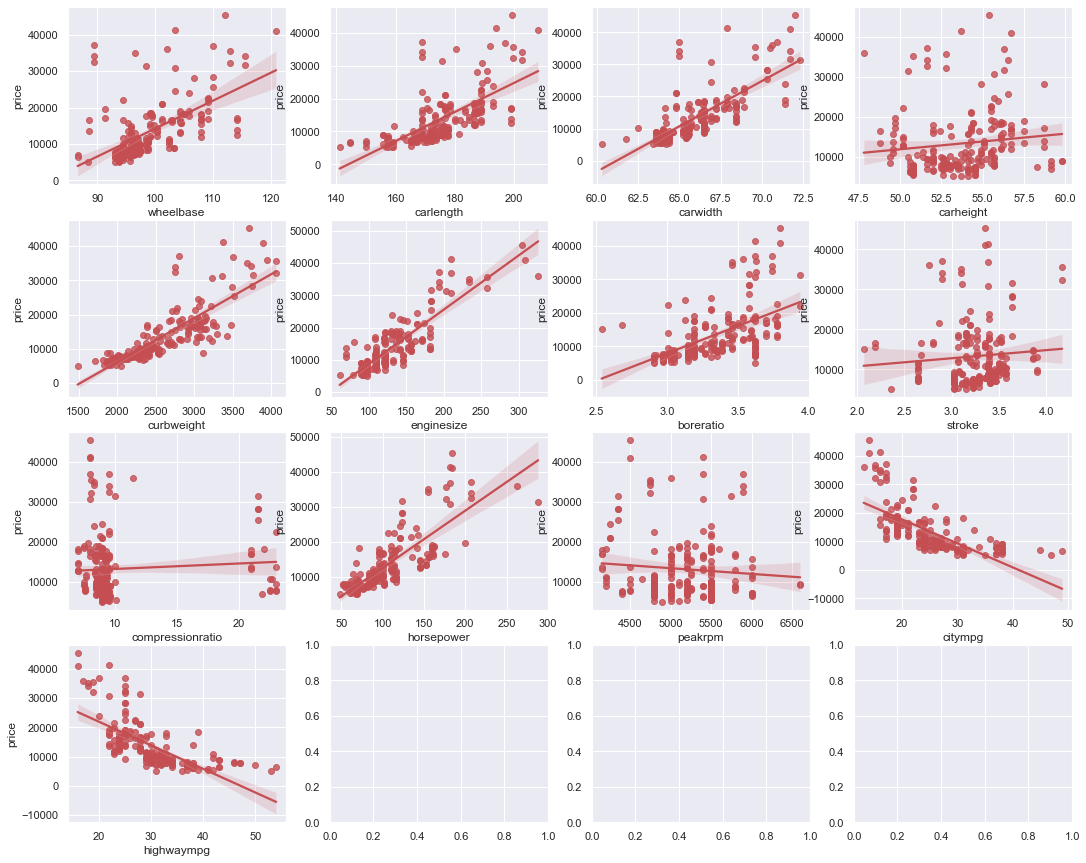

In [90]:
fig,axes = plt.subplots(4,4,figsize=(18,15))
for seg,col in enumerate(numericalCols[:len(numericalCols)-1]):
    
    x,y = seg//4,seg%4
    sns.regplot(x=col, y='price' ,data=car,ax=axes[x][y],color='r')


<font size="+3" color='#540b11'><b>3. Feature Selection </b></font>

In order for a model to predict the target variable, feature selection methods aim to minimise the number of input variables to those that are thought to be most helpful.

In [91]:
X=car[numericalCols].drop('price',axis=1)
y=car['price']

# Recursive feature elimination (RFE) with random forest

In [92]:
X = car.apply(lambda col: preprocessing.LabelEncoder().fit_transform(col))
X=X.drop(['CompanyName','price'],axis=1)
y=car['price']

In [93]:

# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestRegressor()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=15, step=1)
rfe = rfe.fit(X, y)
print('Chosen best 15 feature by rfe:',X.columns[rfe.support_])


Chosen best 15 feature by rfe: Index(['carbody', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')


In [94]:
features=list(X.columns[rfe.support_])

<font size="+3" color='#540b11'><b>4. Data Modelling and Evaluation </b></font>

In [95]:
x = X[features]
y = car.price
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)

# Linear Regression

In [96]:
lreg = linear_model.LinearRegression()
lreg.fit(x_train,y_train)
y_train_pred = lreg.predict(x_train)
y_test_pred = lreg.predict(x_test)
lreg.score(x_test,y_test)

0.7375029659751735

# Decision Tree Regressor

In [97]:
dt_regressor = DecisionTreeRegressor(random_state=0)
dt_regressor.fit(x_train,y_train)
y_train_pred = dt_regressor.predict(x_train)
y_test_pred = dt_regressor.predict(x_test)
dt_regressor.score(x_test,y_test)

0.8839965378654326

# Random Forest regressor

In [98]:
Rf = RandomForestRegressor(n_estimators = 15,
                              criterion = 'mse',
                              random_state = 20,
                              n_jobs = -1)
Rf.fit(x_train,y_train)
Rf_train_pred = Rf.predict(x_train)
Rf_test_pred = Rf.predict(x_test)


r2_score(y_test,Rf_test_pred)

0.9065838247336128

# Conclusion

* We used three models: Random Forest, Decision Tree, and Linear Regression. 
* As can be seen, Random Forest performs best (accuracy 0.90).


